# Assignment 3
## Group Members:
* ### Nils Dunlop, e-mail: gusdunlni@student.gu.se
* ### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se

## Problem 1

In [1]:
class Complex():
    # Initialize the complex number with real and imag parts
    def __init__(self, real, imag):
        self.__real = real
        self.__imag = imag

    # Getter method to get the real part of the complex number
    @property
    def real(self):
        return self.__real

    # Getter method to get the imaginary part of the complex number
    @property
    def imag(self):
        return self.__imag

    # Represent the complex number as a string
    def __str__(self):
        # Handle case when the imaginary part is zero
        if self.imag == 0:
            return f"{self.real}"
        # Format negative imaginary numbers
        elif self.imag < 0:
            return f"{self.real}{self.imag}i"
        # Format positive imaginary numbers
        else:
            return f"{self.real}+{self.imag}i"
    
    # Add two complex numbers
    def __add__(self, other):
        if isinstance(other, Complex):
            return Complex(self.real + other.real, self.imag + other.imag)
        else:
            raise ValueError("Can only add two Complex numbers")

    # Subtract two complex numbers
    def __sub__(self, other):
        if isinstance(other, Complex):
            return Complex(self.real - other.real, self.imag - other.imag)
        else:
            raise ValueError("Can only subtract two Complex numbers")

    # Multiply two complex numbers using FOIL method
    def __mul__(self, other):
        if isinstance(other, Complex):
            real_part = (self.real * other.real) - (self.imag * other.imag)
            imag_part = (self.real * other.imag) + (self.imag * other.real)
            return Complex(real_part, imag_part)
        else:
            raise ValueError("Can only multiply with another Complex number")

    # Divide two complex numbers
    def __truediv__(self, other):
        if isinstance(other, Complex):
            if other.__real == 0 and other.__imag == 0:
                raise ValueError("Cannot divide by zero")

            # Multiply by the conjugate of the denominator and divide by the modulus squared
            num = self * other.conjugate()
            den = (other.real**2 + other.imag**2)

            real_part = num.real / den
            imag_part = num.imag / den

            return Complex(real_part, imag_part)
        else:
            raise ValueError("Can only divide by another Complex number")
        
    # Check for equality between two complex numbers
    def __eq__(self, other):
        if isinstance(other, Complex):
            return self.real == other.real and self.imag == other.imag
        return False

    # Check for inequality between two complex numbers
    def __ne__(self, other):
        return not self.__eq__(other)

    # Return the conjugate of a complex number
    def conjugate(self):
        return Complex(self.real, -self.imag)
    
    # Calculate the magnitude (norm) of a complex number
    @staticmethod # We created a static method to handle the assignment usage .norm(z1*z2*z3) 
    def norm(c):
        return (c.real**2 + c.imag**2)**(1/2)

# Assignment usage
z1 = Complex(1, 2)
z2 = Complex(5, -2)
z3 = Complex(-2, 3)
print(z1 + z2)
print(z3 - z1)
print(z1 * z2)
print(z1 * z2 / z3)
print(z1 == z1)
print(z2 != z3)
print(z1.conjugate())
print(Complex.norm(z1*z2*z3))

6
-3+1i
9+8i
0.46153846153846156-3.3076923076923075i
True
True
1-2i
43.41658669218482


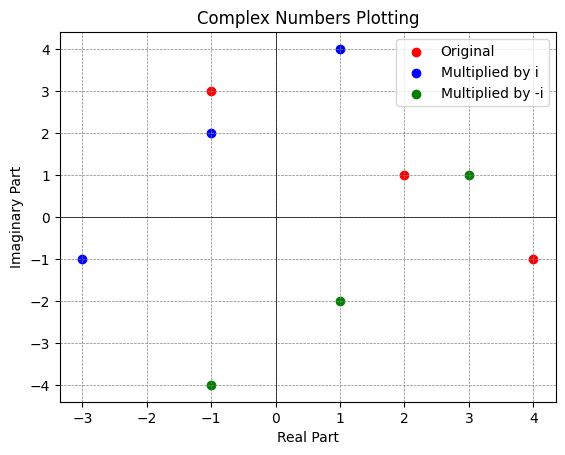

In [2]:
# Import libaries
import matplotlib.pyplot as plt

# Initalize complex numbers
z1 = Complex(2, 1)
z2 = Complex(-1, 3)
z3 = Complex(4, -1)

# Add the complex numbers to a list
points = [z1, z2, z3]

# Extract real and imaginary parts for plotting
real = [z.real for z in points]
imag = [z.imag for z in points]

# Add a scatterplot to the plot of the original complex numbers points
plt.scatter(real, imag, color='red', label='Original')

# Multiply the complex numbers by i
i = Complex(0, 1)
points_i = [z * i for z in points]
real_i = [z.real for z in points_i]
imag_i = [z.imag for z in points_i]

# Add a scatterplot to the plot of the complex numbers points multiplied by i
plt.scatter(real_i, imag_i, color='blue', label='Multiplied by i')

# Multiply the complex numbers by i
neg_i = Complex(0, -1)
points_neg_i = [z * neg_i for z in points]
real_neg_i = [z.real for z in points_neg_i]
imag_neg_i = [z.imag for z in points_neg_i]

# Add a scatterplot to the plot of the complex numbers points multiplied by -i
plt.scatter(real_neg_i, imag_neg_i, color='green', label='Multiplied by -i')

# Formatting the plot
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Complex Numbers Plotting')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

* Multiplication by `i` results in a counter-clockwise rotation of 90 degrees about the origin in the complex plane.
* Multiplication by `-i` results in a clockwise rotation of 90 degrees about the origin in the complex plane.

#### Explain the benefit of built-in dunder methods.

There are several benefits with using the built-in dunder methods in Python.

1. Helps us modify the standard functionality of certain operations with a certain class e.g. how we modified '+' operation interaction with our Complex class. 
2. Helps the code become more readable.
3. Allows us to create custom behaviour e.g. how we wanted the complex number string to be printed during certain instances.

#### Explain why one might want to use static methods.

Static methods offer some key advantages to non-static methods:
1. Statelessness: They operate independently of instance or class data, ensuring consistent results regardless of the object's state.
2. Class Independence: Unaffected by class attributes or methods, static methods remain resilient to changes in the class's structure.

In short, static methods allows us to create reliable functions within a class that stand apart from its inherent dynamics.

## Problem 2

#### Define a class `Cipher()`

In [3]:
class Cipher():
    def __init__(self, sender, receiver): # Initialize the cipher with sender and receiver
        self._sender = sender 
        self._receiver = receiver

    @property # Getter method to get the sender
    def sender(self):
        return self._sender

    @sender.setter # Setter method to set the sender
    def sender(self, sender):
        self._sender = sender

    @property # Getter method to get the receiver
    def receiver(self):
        return self._receiver

    @receiver.setter # Setter method to set the receiver
    def receiver(self, receiver):
        self._receiver = receiver

In [4]:
# Usage of the Cipher class
basic_cipher = Cipher("Alice", "Bob")
print(basic_cipher.sender)
print(basic_cipher.receiver)

Alice
Bob


#### Define a class `AlphabetCipher()`

In [5]:
class AlphabetCipher(Cipher):
    def __init__(self, sender, receiver, key):
        super().__init__(sender, receiver) # Call the parent class constructor to set sender and receiver  
        self.key = key

    def _shift_char(self, char, shift): # Character shifting method for encoding and decoding text
        if char.isalpha(): # Check if the character is an alphabet
            is_upper = char.isupper()
            char = char.upper()
            char_value = ord(char) - ord('A') # Convert the character to a number between 0 and 25
            shifted_char_value = (char_value + shift) % 26 # Shift the character by the shift amount
            shifted_char = chr(shifted_char_value + ord('A')) # Convert the number back to a character between A and Z
            return shifted_char.lower() if not is_upper else shifted_char
        return char

    def encode(self, message):
        encoded_message = "".join(self._shift_char(char, self.key) for char in message)
        return encoded_message

    def decode(self, encoded_message):
        decoded_message = "".join(self._shift_char(char, -self.key) for char in encoded_message)
        return decoded_message


In [6]:
# Usage of the AlphabetCipher class
alphaCipher = AlphabetCipher("Alice", "Bob", 2)
encodedString = alphaCipher.encode("PYTHON IS A PROGRAMMING LANGUAGE") 
print(encodedString)
decodedString = alphaCipher.decode(encodedString) 
print(decodedString)

RAVJQP KU C RTQITCOOKPI NCPIWCIG
PYTHON IS A PROGRAMMING LANGUAGE


#### Define a class `XORCipher()`

In [7]:
class XORCipher(Cipher):
    def __init__(self, sender, receiver, key):
        super().__init__(sender, receiver)
        if len(key) != 1 or not 'A' <= key <= 'Z': # Check if the key is a single capital letter A-Z
            raise ValueError("Key should be a single capital letter A-Z")
        self.key = key

    def encode(self, message):
        encoded_message = []
        for char in message:
            if char == ' ': # Preserve spaces in the message 
                encoded_message.append(char)
            else:
                encoded_char = chr(ord(char) ^ ord(self.key))
                encoded_message.append(encoded_char)
        return ''.join(encoded_message)

    def decode(self, encoded_message):
        return self.encode(encoded_message)  # XOR twice to get back to the original message

In [8]:
# Usage of the XORCipher class
xorcipher = XORCipher("Alice", "Bob", "A")
encodedString = xorcipher.encode("THIS IS A SECRET MESSAGE")
print([char for char in encodedString])
decodedString = xorcipher.decode(encodedString)
print(decodedString)

['\x15', '\t', '\x08', '\x12', ' ', '\x08', '\x12', ' ', '\x00', ' ', '\x12', '\x04', '\x02', '\x13', '\x04', '\x15', ' ', '\x0c', '\x04', '\x12', '\x12', '\x00', '\x06', '\x04']
THIS IS A SECRET MESSAGE


#### Define a class `HybridCipher()`

In [9]:
class HybridCipher(Cipher):
    def __init__(self, sender, receiver, alphabet_key, xor_key):
        super().__init__(sender, receiver)
        self.alphabet_cipher = AlphabetCipher(sender, receiver, alphabet_key)
        self.xor_cipher = XORCipher(sender, receiver, xor_key)

    def encode(self, message):
        # First, use the AlphabetCipher encode method
        alphabet_encoded = self.alphabet_cipher.encode(message)
        # Then, use the XORCipher encode method on the result
        hybrid_encoded = self.xor_cipher.encode(alphabet_encoded)
        return hybrid_encoded

    def decode(self, encoded_message):
        # First, use the XORCipher decode method
        xor_decoded = self.xor_cipher.decode(encoded_message)
        # Then, use the AlphabetCipher decode method on the result
        hybrid_decoded = self.alphabet_cipher.decode(xor_decoded)
        return hybrid_decoded

In [10]:
# Usage of the HybridCipher class
hybrid = HybridCipher("Alice", "Bob", 12, "F")
encodedString = hybrid.encode("THIS IS ANOTHER SECRET MESSAGE")
print([char for char in encodedString])
decodedString = hybrid.decode(encodedString)
print(decodedString)

['\x00', '\x12', '\x13', '\x03', ' ', '\x13', '\x03', ' ', '\x0b', '\x1c', '\x07', '\x00', '\x12', '\x17', '\x02', ' ', '\x03', '\x17', '\t', '\x02', '\x17', '\x00', ' ', '\x1f', '\x17', '\x03', '\x03', '\x0b', '\x15', '\x17']
THIS IS ANOTHER SECRET MESSAGE
